<a href="https://colab.research.google.com/github/fariasfranco/Crimenes/blob/main/Crimenes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Paso 1: Importar bibliotecas y cargar datos


In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar datos
data = pd.read_csv("Crimenes.csv")
data

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


##Paso 2: Explorar y preprocesar los datos

In [ ]:
# Explorar datos
print(data.head())
print(data.info())
print(data.describe())

# Verificar y manejar valores nulos si los hay
data = data.dropna()

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']])

       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None
       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.0000

##Paso 3: Determinar el número óptimo de clusters

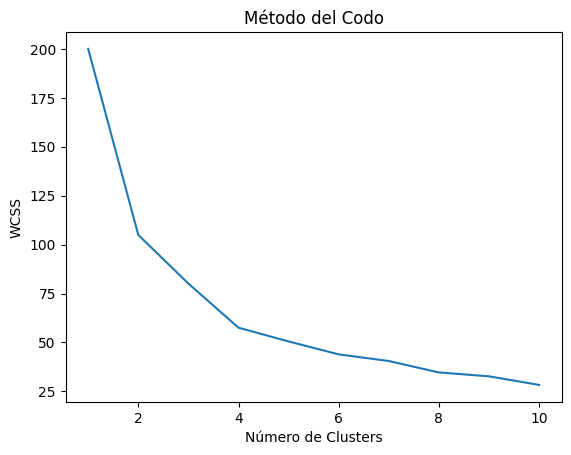

In [ ]:
# Utilizar el método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

##Paso 4: Aplicar el algoritmo de clustering

In [ ]:
# Seleccionar el número óptimo de clusters y aplicar KMeans
NUMERO_OPTIMO = 2  # Utilizamos 2 clusters para separar en baja y alta peligrosidad
kmeans = KMeans(n_clusters=NUMERO_OPTIMO, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Agregar la columna de clusters al conjunto de datos
data['Peligrosidad'] = clusters

##Paso 5: Visualizar resultados en espacio PCA

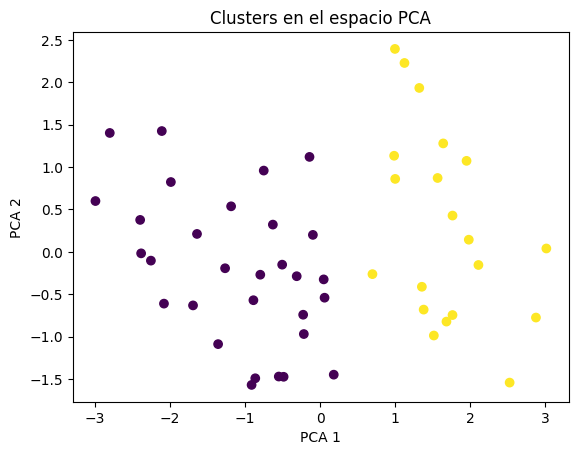

In [ ]:
# Visualizar los clusters en el espacio reducido por PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters en el espacio PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

##Paso 6: Visualizar la distribución de variables para cada cluster

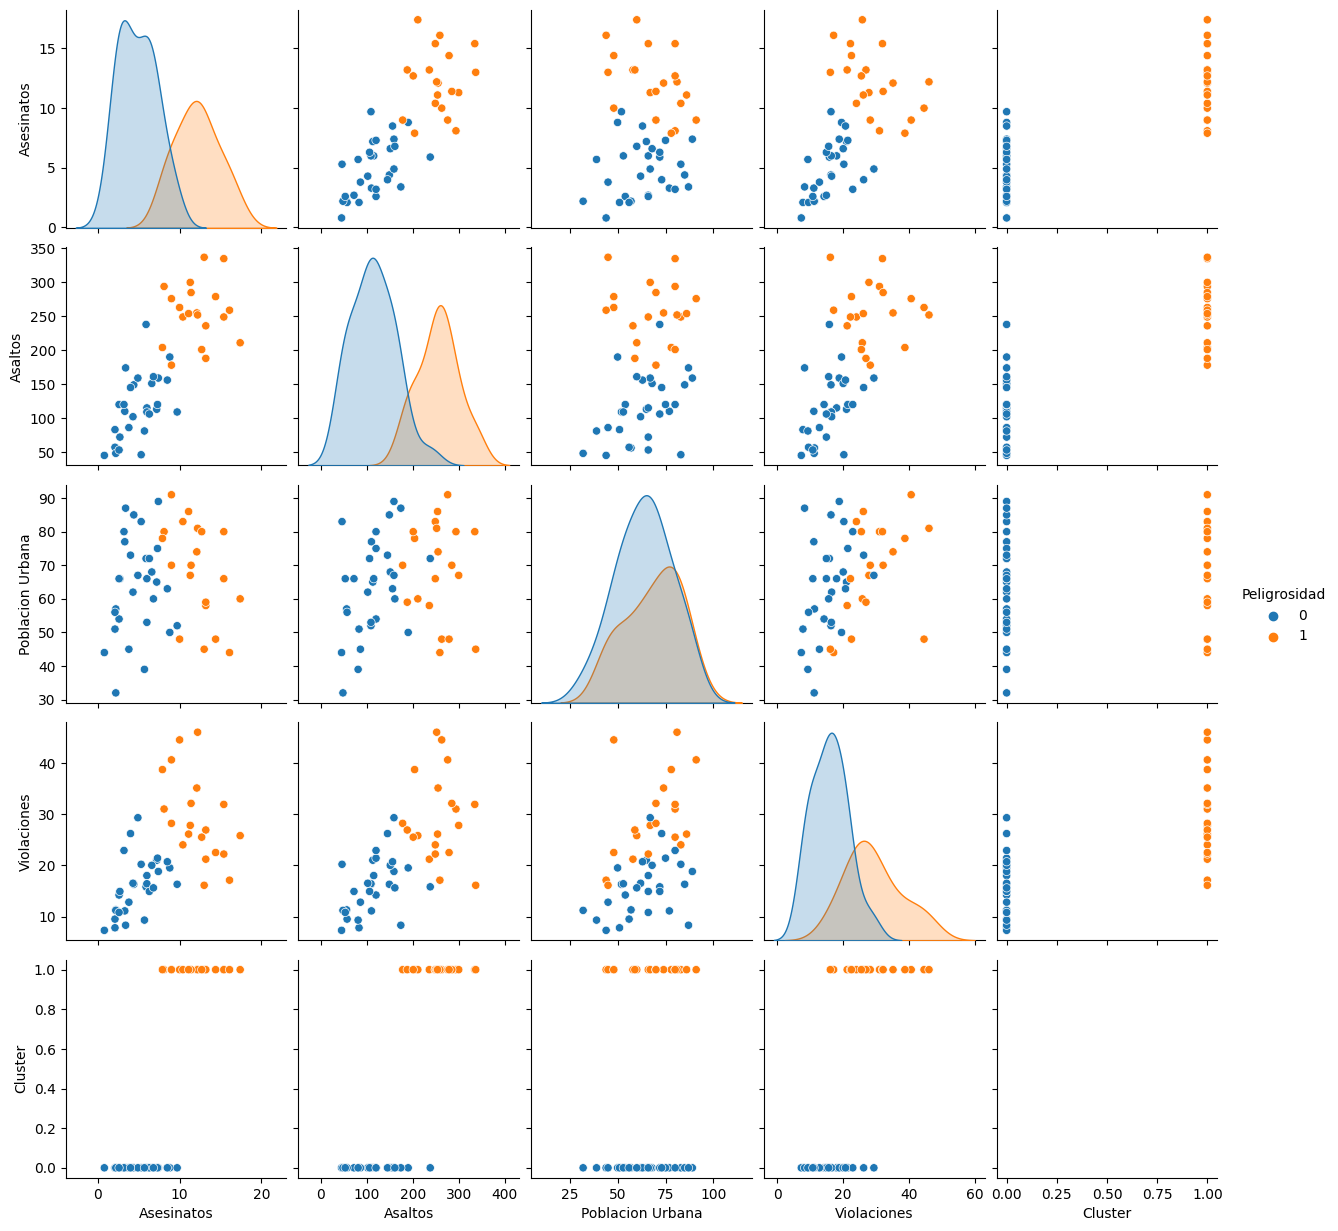

Estados de Baja Peligrosidad:
3          Arkansas
6       Connecticut
7          Delaware
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
20    Massachusetts
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
29       New Jersey
33     North Dakota
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
40     South Dakota
43             Utah
44          Vermont
45         Virginia
46       Washington
47    West Virginia
48        Wisconsin
49          Wyoming
Name: Estado, dtype: object

Estados de Alta Peligrosidad:
0            Alabama
1             Alaska
2            Arizona
4         California
5           Colorado
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
24          Missouri
27            Nevada
30        New Mex

In [ ]:
# Visualizar la distribución de variables para cada peligrosidad
sns.pairplot(data, hue='Peligrosidad')
plt.show()

# Analizar la asignación de estados a zonas de baja y alta peligrosidad
# Puedes revisar estadísticas descriptivas o cualquier criterio relevante
baja_peligrosidad = data[data['Peligrosidad'] == 0]
alta_peligrosidad = data[data['Peligrosidad'] == 1]

print("Estados de Baja Peligrosidad:")
print(baja_peligrosidad['Estado'])

print("\nEstados de Alta Peligrosidad:")
print(alta_peligrosidad['Estado'])